# Using Dictionaries

### Creating a dictionary

In [6]:
d = {}
d

{}

In [10]:
d = dict()  # alternate way to create a dictionary
d["python"] = "A common snake."
d

{'python': 'A common snake.'}

In [11]:
d["python"]

'A common snake.'

### Filling a dictionary at creation

You can create a dictionary with values already filled:

In [13]:
base_names = {
    'A': "Adenine",
    'C': "Cytosine",
    'G': "Guanine",
    'U': "Uracil"
}
base_names

{'A': 'Adenine', 'C': 'Cytosine', 'G': 'Guanine', 'U': 'Uracil'}

Mixed types are OK:

In [15]:
{4: "a number",
"number": 4,
"boolean": True}

{4: 'a number', 'number': 4, 'boolean': True}

## Counting with dictionaries

The following code is a varaint on that shown in the lecture for counting sequence lengths. Here are the first 10 lines of the file: 

In [1]:
%%bash
head -10 ../data/multi_seqs.txt

MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVIST
STLPGVQISFSDGRAKLTIPAVTKANSGRYSLKATNGSGQATSTAELLVKAETAPPN
FVQRLQSMTVRQGSQVRLQVRVTGIPTPVVKFYRDGAEIQS
SLDFQISQEGDLYSLLIAEAYPEDSGTYSVNATN
SVGRATSTAELLVQGEEEVPAKKTKTIVSTAQISESRQTRIEKKIEAH
FDARSIATVEMVIDGAAGQQLPHKTPPRIPPKPKSRSPTPPSIAAKAQLARQQSPSPIRHSPSPVRHV
RAPTPSPVRSVSPAARISTSPIRSVRSPLLMRKTQASTVATGPEVPPPWKQEGYVA
SSSEAEMRETTLTTSTQIRTEERWEGRYGVQEQVTISGAAGAAASVSASASYAA
EAVATGAKEVKQDADKSAAVATVVAAVDMARVREPVISAVEQTAQRTTTTAVHIQPAQEQVRKE
AEKTAVTKVVVAADKAKEQELKSRTKEVITTKQEQMHVTHEQIRKETEKTFVPKVV


Now here is the code. Note the two import statements at the top: the first enables us to create a dictionary with default value; the second enables sorting by values.

In [7]:
multi_seqs_fname = '../data/multi_seqs.txt'

from collections import defaultdict
import operator

d = defaultdict(int)
with open(multi_seqs_fname, 'r') as f:
     for line in f:
        d[len(line.rstrip())] += 1
        
for k, v in sorted(d.items(), key=operator.itemgetter(1), reverse=True):
    print(k, v)

57 6
56 5
58 4
48 2
54 2
64 2
61 2
62 2
60 2
42 2
53 2
41 1
34 1
68 1
63 1
70 1
65 1
59 1
38 1
55 1
45 1


In [9]:
help(line.rstrip)

Help on built-in function rstrip:

rstrip(chars=None, /) method of builtins.str instance
    Return a copy of the string with trailing whitespace removed.
    
    If chars is given and not None, remove characters in chars instead.



We can also plot that data. Only the 3rd line list the dictionary, the rest is "boilerplate" code needed to show the plot:

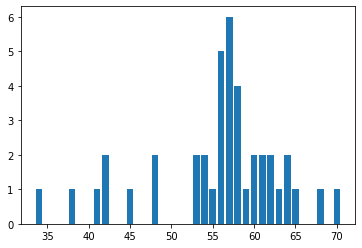

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(d.keys(), d.values()) # only line listing the dictionary!
plt.show()

## Dictionaries and sets

One of the defining properties of dictionaries is the uniqueness of the keys. One consequence is that dictionaries can be used to **remove duplicates**, although (as we will see shortly) Python has another data type that is an even better fit for this task. 

First, consider the following three files:

In [23]:
%%bash
echo "words1.txt:"
cat ../data/words1.txt
echo
echo "words2.txt:"
cat ../data/words2.txt
echo
echo "words3.txt:"
cat ../data/words3.txt

words1.txt:
flycatcher
gnatcatcher
bee-eater
kingfisher

words2.txt:
flycatcher
warbler
kingfisher
thrush
sparrow
hawk

words3.txt:
crane
flycatcher
warbler
stork
kingfisher
thrush


Using dictionaries, one could do this:

In [10]:
words1_fname = '../data/words1.txt'
words2_fname = '../data/words2.txt'
words3_fname = '../data/words3.txt'

all_words = {}
with open(words1_fname, 'r') as f:
    for line in f:
        all_words[line.rstrip()] = True
with open(words2_fname, 'r') as f:
    for line in f:
        all_words[line.rstrip()] = True
with open(words3_fname, 'r') as f:
    for line in f:
        all_words[line.rstrip()] = True
for k in all_words:
    print(k)

KeyError: 'flycatcher'

Notice in the above I use `string.strip()` to remove newline characters and `True` as a dummy value (I don't have values, I'm just interested in the keys).

Is there a better option? Yes, there is the Python **set() datatype**, which is like a dictionary without values.

In [25]:
all_words = set()
with open(words1_fname, 'r') as f:
    all_words.update(f.read().splitlines())
with open(words2_fname, 'r') as f:
    all_words.update(f.read().splitlines())
with open(words3_fname, 'r') as f:
    all_words.update(f.read().splitlines())
for k in all_words:
    print(k)

hawk
crane
kingfisher
warbler
stork
sparrow
flycatcher
bee-eater
gnatcatcher
thrush


What about finding the words that are in all the files? In set theory (a branch of mathematical logic) this is known as finding the **intersection**. Here is a solution using sets and logical AND (`&`) operators: 

In [13]:
words1 = set()
with open(words1_fname, 'r') as f:
    words1.update(f.read().splitlines())
words2 = set()
with open(words2_fname, 'r') as f:
    words2.update(f.read().splitlines())
words3 = set()
with open(words3_fname, 'r') as f:
    words3.update(f.read().splitlines())
print(words1 & words2 & words3)

{'kingfisher', 'flycatcher'}


## Sorting keys by their value

The following code is copied from the first section of this Notebook ("Counting with dictionaries"). Modify the code so that it prints out the sequences sorted by ascending length. Hence the first six lines of output should be:

<pre>SLDFQISQEGDLYSLLIAEAYPEDSGTYSVNATN
PIGDPTMVVEWLHDGKPLEAANRLRMINEFGYCSLDYG
FVQRLQSMTVRQGSQVRLQVRVTGIPTPVVKFYRDGAEIQS
VAYSRDSGIITCRATNKYGTDHTSATLIVKDEKSLVEESQLP
RDVTAEDSASIMVKAINIAGETSSHAFLLVQAKQLITFTQEL
IDTSDAEDYSCVLVEDENVKTTAKLIVEGAVVEFVKELQDIEVPE</pre>

*Hint:* The crucial thing to solve this task is to change what is stored as the dictionary value. Rather than the count, you need to store the sequence length (calculated using the `len()` function).

In [56]:
from collections import defaultdict
import operator

# defaultdict needs to be a string, and value needs to call the string itself rather than counting lengths/adding '1'.
d = defaultdict(str)
with open(multi_seqs_fname, 'r') as f:
     for line in f:
        d[len((line.rstrip()))] = line.rstrip()

# operator needs to refer to 1st element in tuple so it doesn't sort alphabetically
for k, v in sorted(d.items(), key=operator.itemgetter(0), reverse=False):
    print(k, v)


34 SLDFQISQEGDLYSLLIAEAYPEDSGTYSVNATN
38 PIGDPTMVVEWLHDGKPLEAANRLRMINEFGYCSLDYG
41 FVQRLQSMTVRQGSQVRLQVRVTGIPTPVVKFYRDGAEIQS
42 RDVTAEDSASIMVKAINIAGETSSHAFLLVQAKQLITFTQEL
45 IDTSDAEDYSCVLVEDENVKTTAKLIVEGAVVEFVKELQDIEVPE
48 SVGRATSTAELLVQGEEEVPAKKTKTIVSTAQISESRQTRIEKKIEAH
53 ENPEGVIEHKVKLEIQQREDFRSVLRRAPEPRPEFHVHEPGKLQFEVQKVDRP
54 RCRVTGYPQPKVNWYLNGQLIRKSKRFRVRYDGIHYLDIVDCKSYDTGEVKVTA
55 QDVVAKEKDTMATFECETSEPFVKVKWYKDGMEVHEGDKYRMHSDRKVHFLSILT
56 PAAPYFITKPVVQKLVEGGSVVFGCQVGGNPKPHVYWKKSGVPLTTGYRYKVSYNK
57 ERIQSQTVGQGSDAHFRVRVVGKPDPECEWYKNGVKIERSDRIYWYWPEDNVCELVI
58 AALKIDSTVSQDSAWYTATAINKAGRDTTRCKVNVEVEFAEPEPERKLIIPRGTYRAK
59 SPGRRLEETDESQLERLYKPVFVLKPVSFKCLEGQTARFDLKVVGRPMPETFWFHDGQQ
60 NEAGTVSTSCYLAVQVSEEFEKETTAVTEKFTTEEKRFVESRDVVMTDTSLTEEQAGPGE
61 QTGECKLVISMTFADDAGEYTIVVRNKHGETSASASLLEEADYELLMKSQQEMLYQTQVTA
62 LPKIAWYKDGKRIKHGERYQMDFLQDGRASLRIPVVLPEDEGIYTAFASNIKGNAICSGKLY
63 ISAAKAKEQETRISEEITKKQKQVTQEAIRQETEITAASMVVVATAKSTKLETVPGAQEETTT
64 QQDQMHLSYEKIMKETRKTVVPKVIVATPKVKEQDLVSRGREG

In [34]:
help(operator)

Help on module operator:

NAME
    operator - Operator interface.

MODULE REFERENCE
    https://docs.python.org/3.8/library/operator
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module exports a set of functions implemented in C corresponding
    to the intrinsic operators of Python.  For example, operator.add(x, y)
    is equivalent to the expression x+y.  The function names are those
    used for special methods; variants without leading and trailing
    '__' are also provided for convenience.

CLASSES
    builtins.object
        attrgetter
        itemgetter
        methodcaller
    
    class attrgetter(builtins.object)
     |  attrgetter(attr, ...) --> attrgetter object
     |  
     